# Redes Neuronales Recurrentes

In [76]:
# librerias a utilizar en el notebook
import numpy as np
import pandas as pd

In [77]:
# cargamos el dataset csv
df = pd.read_csv('jena_climate_2009_2016.csv')
df

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.30,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.40,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.90,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.20,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.10,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420546,31.12.2016 23:20:00,1000.07,-4.05,269.10,-8.13,73.10,4.52,3.30,1.22,2.06,3.30,1292.98,0.67,1.52,240.0
420547,31.12.2016 23:30:00,999.93,-3.35,269.81,-8.06,69.71,4.77,3.32,1.44,2.07,3.32,1289.44,1.14,1.92,234.3
420548,31.12.2016 23:40:00,999.82,-3.16,270.01,-8.21,67.91,4.84,3.28,1.55,2.05,3.28,1288.39,1.08,2.00,215.2
420549,31.12.2016 23:50:00,999.81,-4.23,268.94,-8.53,71.80,4.46,3.20,1.26,1.99,3.20,1293.56,1.49,2.16,225.8


In [78]:
# agarramos la col TAVG y la convertimos en un array
data = df['T (degC)'].values
data.shape

(420551,)

In [79]:
# Definir la longitud de las secuencias
longitud_secuencia = 31

# Calcular el número de secuencias completas que se pueden formar
num_secuencias = len(data) // longitud_secuencia

# Inicializar listas vacías para almacenar X e Y
series = []

# Crear las secuencias de entrada (X) y sus correspondientes valores objetivo (Y)
for i in range(num_secuencias):
    secuencia = data[i * longitud_secuencia: (i + 1) * longitud_secuencia]
    series.append(secuencia)

# Convertir las listas en arrays de NumPy
series = np.array(series).astype(np.float32)

# Cambiar la forma de X a (número de secuencias, longitud de secuencia, número de características)
series = np.reshape(series, (series.shape[0], series.shape[1], 1))

# Verificar las dimensiones de X e Y
print("Dimensiones de X:", series.shape)

Dimensiones de X: (13566, 31, 1)


In [80]:
print(series[0])

[[-8.02]
 [-8.41]
 [-8.51]
 [-8.31]
 [-8.27]
 [-8.05]
 [-7.62]
 [-7.62]
 [-7.91]
 [-8.43]
 [-8.76]
 [-8.88]
 [-8.85]
 [-8.83]
 [-8.66]
 [-8.66]
 [-8.7 ]
 [-8.81]
 [-8.84]
 [-8.94]
 [-8.94]
 [-8.86]
 [-8.99]
 [-9.05]
 [-9.23]
 [-9.49]
 [-9.5 ]
 [-9.35]
 [-9.47]
 [-9.63]
 [-9.67]]


In [81]:
# normalizar los datos de entrada y salida entre -1 y 1
# Valores mínimos y máximos en tu dataset original
min_valor = series.min()
max_valor = series.max()

# Rango al que quieres normalizar
rango_normalizado = (-1, 1)

# Normalizar el dataset
series_normalized = (series - min_valor) / (max_valor - min_valor) * (rango_normalizado[1] - rango_normalizado[0]) + rango_normalizado[0]

# Verificar los valores normalizados
print("Valores normalizados:", series_normalized.min(), series_normalized.max())
series = series_normalized

Valores normalizados: -1.0 1.0


In [82]:
print(series[0])

[[-0.5027368 ]
 [-0.51567423]
 [-0.5189916 ]
 [-0.512357  ]
 [-0.5110301 ]
 [-0.50373197]
 [-0.48946756]
 [-0.48946756]
 [-0.49908775]
 [-0.51633775]
 [-0.5272848 ]
 [-0.53126556]
 [-0.53027034]
 [-0.52960694]
 [-0.5239675 ]
 [-0.5239675 ]
 [-0.5252944 ]
 [-0.5289434 ]
 [-0.52993864]
 [-0.53325593]
 [-0.53325593]
 [-0.5306021 ]
 [-0.5349146 ]
 [-0.53690493]
 [-0.5428761 ]
 [-0.55150104]
 [-0.5518328 ]
 [-0.5468569 ]
 [-0.55083764]
 [-0.5561453 ]
 [-0.5574722 ]]


In [83]:
# 13566
X_train, y_train = series[:8000, :longitud_secuencia - 1], series[:8000, -1] # type: ignore
X_valid, y_valid = series[8000:11000, :longitud_secuencia - 1], series[8000:11000, -1] # type: ignore
X_test, y_test = series[11000:, :longitud_secuencia - 1], series[11000:, -1] # type: ignore
series.shape, X_train.shape, y_train.shape # type: ignore

((13566, 31, 1), (8000, 30, 1), (8000, 1))

In [84]:
X_test.shape, y_test.shape

((2566, 30, 1), (2566, 1))

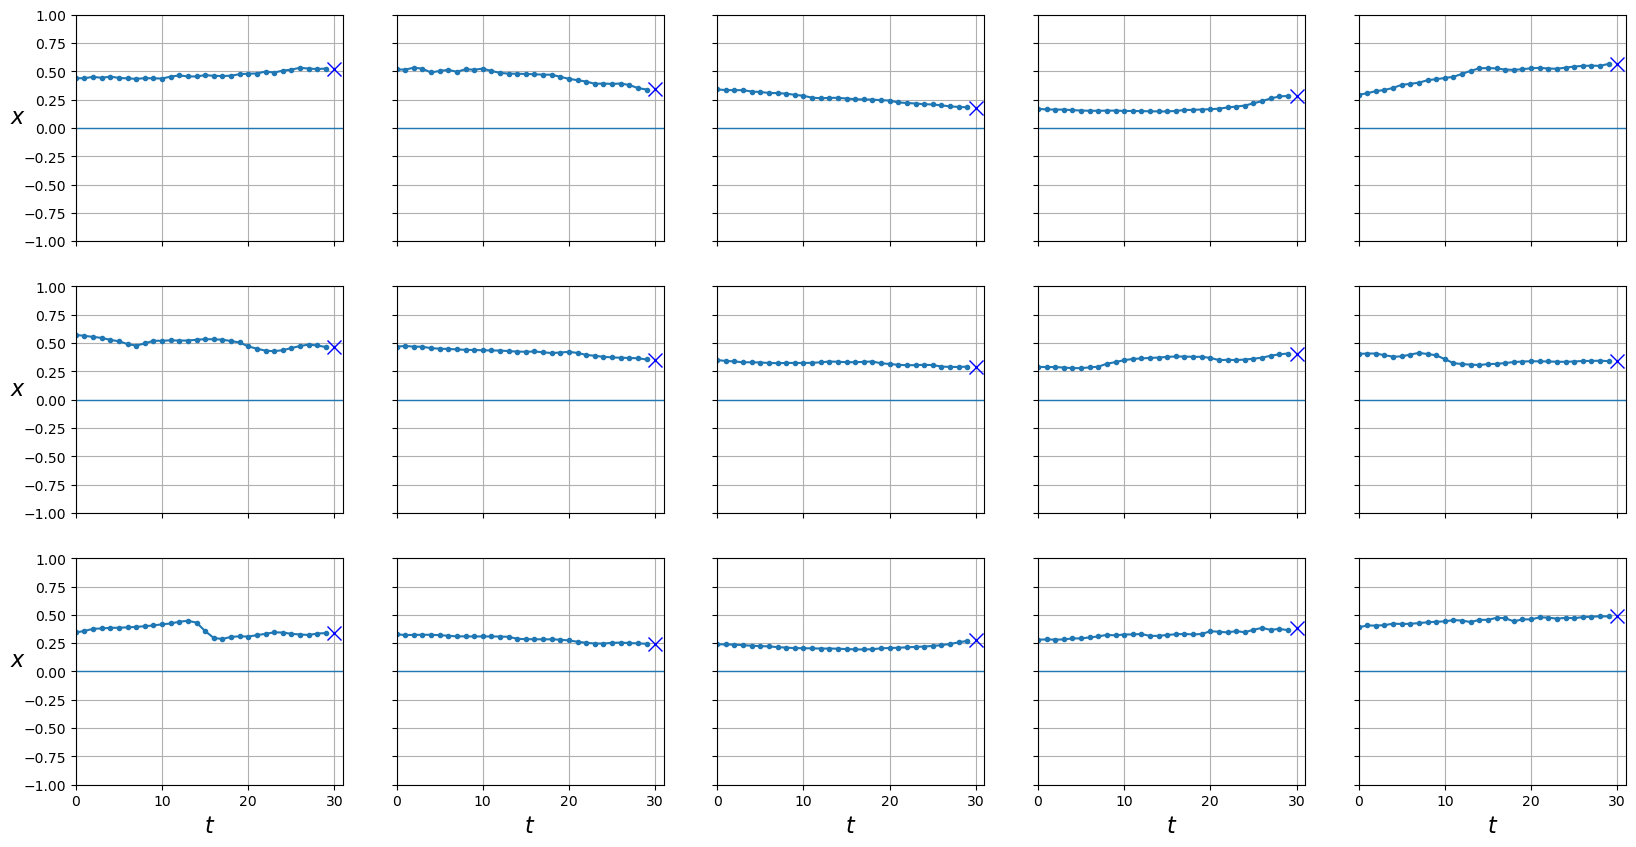

In [85]:
import matplotlib.pyplot as plt

def plot_series(series, y=None, y_pred=None, y_pred_std=None, x_label="$t$", y_label="$x$"):
  r, c = 3, 5
  fig, axes = plt.subplots(nrows=r, ncols=c, sharey=True, sharex=True, figsize=(20, 10))
  for row in range(r):
    for col in range(c):
        plt.sca(axes[row][col])
        ix = col + row*c
        plt.plot(series[ix, :], ".-")
        if y is not None:
            plt.plot(range(len(series[ix, :]), len(series[ix, :])+len(y[ix])), y[ix], "bx", markersize=10)
        if y_pred is not None:
            plt.plot(range(len(series[ix, :]), len(series[ix, :])+len(y_pred[ix])), y_pred[ix], "ro")
        if y_pred_std is not None:
            plt.plot(range(len(series[ix, :]), len(series[ix, :])+len(y_pred[ix])), y_pred[ix] + y_pred_std[ix])
            plt.plot(range(len(series[ix, :]), len(series[ix, :])+len(y_pred[ix])), y_pred[ix] - y_pred_std[ix])
        plt.grid(True)
        plt.hlines(0, 0, 100, linewidth=1)
        plt.axis([0, len(series[ix, :])+len(y[ix]), -1, 1])
        if x_label and row == r - 1:
          plt.xlabel(x_label, fontsize=16)
        if y_label and col == 0:
          plt.ylabel(y_label, fontsize=16, rotation=0)
  plt.show()

plot_series(X_test, y_test)

### Predicción *Naive*

Un modelo muy simple y que puede funcionar sorprendentemente bien en algunas ocasiones es uno que siempre prediga el último valor.

In [95]:
from sklearn.metrics import mean_squared_error

y_pred = X_test[:,-1]
mean_squared_error(y_test, y_pred)

6.5815824e-05

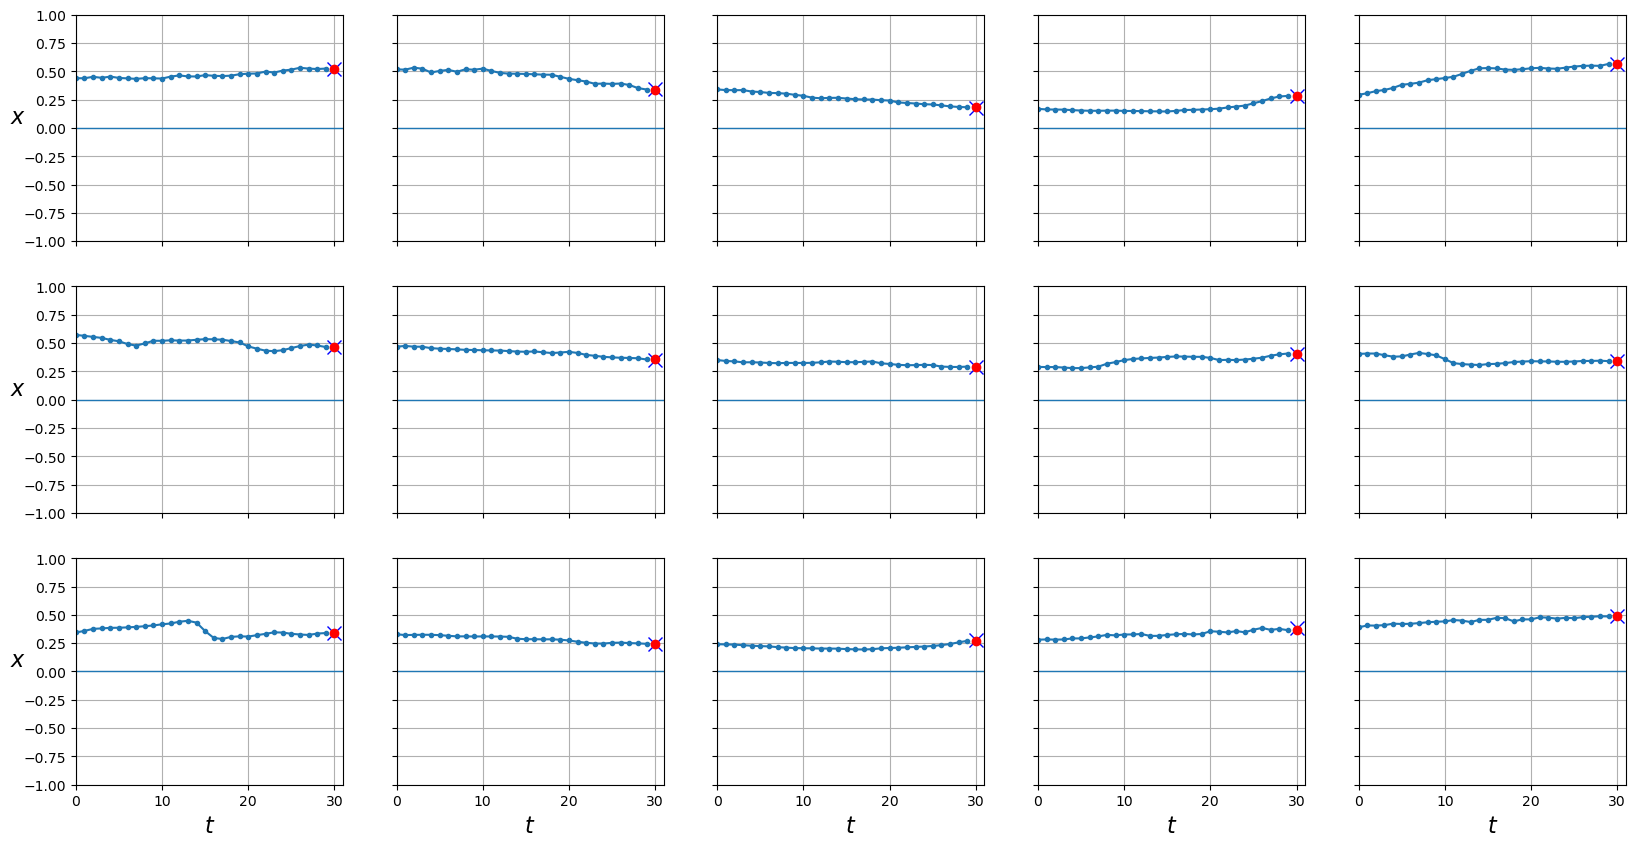

In [96]:
y_pred = X_test[:,-1]
plot_series(X_test, y_test, y_pred)

### Perceptrón Multicapa

En el caso de que todas las secuencias tengan la misma longitud (lo cual no siempre es el caso) podríamos utilizar un `MLP` como los que ya conocemos para la tarea de regresión.

In [97]:
import torch
from torch.utils.data import Dataset, DataLoader

class TimeSeriesDataset(Dataset):
  def __init__(self, X, y=None, train=True):
    self.X = X
    self.y = y
    self.train = train

  def __len__(self):
    return len(self.X)

  def __getitem__(self, ix):
    if self.train:
      return torch.from_numpy(self.X[ix]), torch.from_numpy(self.y[ix])
    return torch.from_numpy(self.X[ix])

dataset = {
    'train': TimeSeriesDataset(X_train, y_train),
    'eval': TimeSeriesDataset(X_valid, y_valid),
    'test': TimeSeriesDataset(X_test, y_test, train=False)
}

dataloader = {
    'train': DataLoader(dataset['train'], shuffle=True, batch_size=64),
    'eval': DataLoader(dataset['eval'], shuffle=False, batch_size=64),
    'test': DataLoader(dataset['test'], shuffle=False, batch_size=64)
}

In [102]:
class MLP(torch.nn.Module):
  def __init__(self, n_in=30, n_out=1):
    super().__init__()
    self.fc = torch.nn.Linear(n_in, n_out)

  def forward(self, x):
    x = x.view(x.shape[0], -1)
    x = self.fc(x)
    return x

mlp = MLP()
mlp

MLP(
  (fc): Linear(in_features=30, out_features=1, bias=True)
)

In [103]:
from tqdm import tqdm
device = "cuda" if torch.cuda.is_available() else "cpu"

def fit(model, dataloader, epochs=10):
    model.to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
    criterion = torch.nn.MSELoss()
    bar = tqdm(range(1, epochs+1))
    for epoch in bar:
        model.train()
        train_loss = []
        for batch in dataloader['train']:
            X, y = batch
            X, y = X.to(device), y.to(device)
            optimizer.zero_grad()
            y_hat = model(X)
            loss = criterion(y_hat, y)
            loss.backward()
            optimizer.step()
            train_loss.append(loss.item())
        model.eval()
        eval_loss = []
        with torch.no_grad():
            for batch in dataloader['eval']:
                X, y = batch
                X, y = X.to(device), y.to(device)
                y_hat = model(X)
                loss = criterion(y_hat, y)
                eval_loss.append(loss.item())
        bar.set_description(f"loss {np.mean(train_loss):.5f} val_loss {np.mean(eval_loss):.5f}")

def predict(model, dataloader):
    model.eval()
    with torch.no_grad():
        preds = torch.tensor([]).to(device)
        for batch in dataloader:
            X = batch
            X = X.to(device)
            pred = model(X)
            preds = torch.cat([preds, pred])
        return preds

In [104]:
fit(mlp, dataloader)

loss 0.00053 val_loss 0.00054: 100%|██████████| 10/10 [00:04<00:00,  2.20it/s]


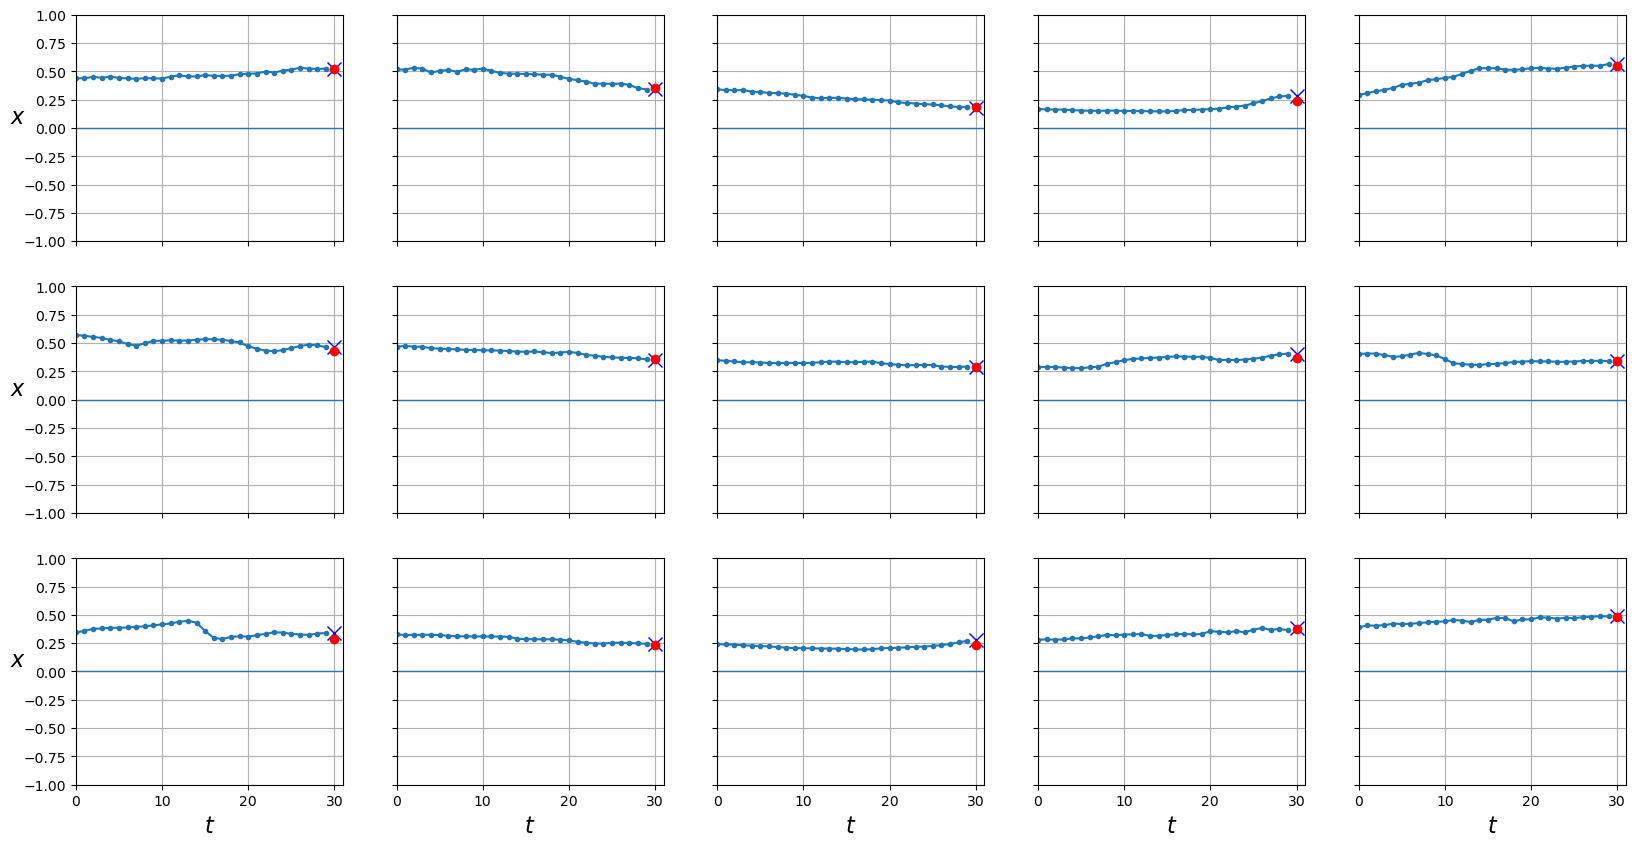

0.0005018804

In [105]:
y_pred = predict(mlp, dataloader['test'])
plot_series(X_test, y_test, y_pred.cpu().numpy())
mean_squared_error(y_test, y_pred.cpu())

### Red Recurrente Simple

In [107]:
class SimpleRNN(torch.nn.Module):
  def __init__(self):
    super().__init__()
    self.rnn = torch.nn.RNN(input_size=1, hidden_size=1, num_layers=1, batch_first=True)

  def forward(self, x):
    x, h = self.rnn(x)
    # solo queremos la última salida
    return x[:,-1]

rnn = SimpleRNN()
rnn

SimpleRNN(
  (rnn): RNN(1, 1, batch_first=True)
)

In [108]:
fit(rnn, dataloader)

loss 0.00101 val_loss 0.00038: 100%|██████████| 10/10 [00:03<00:00,  3.01it/s]


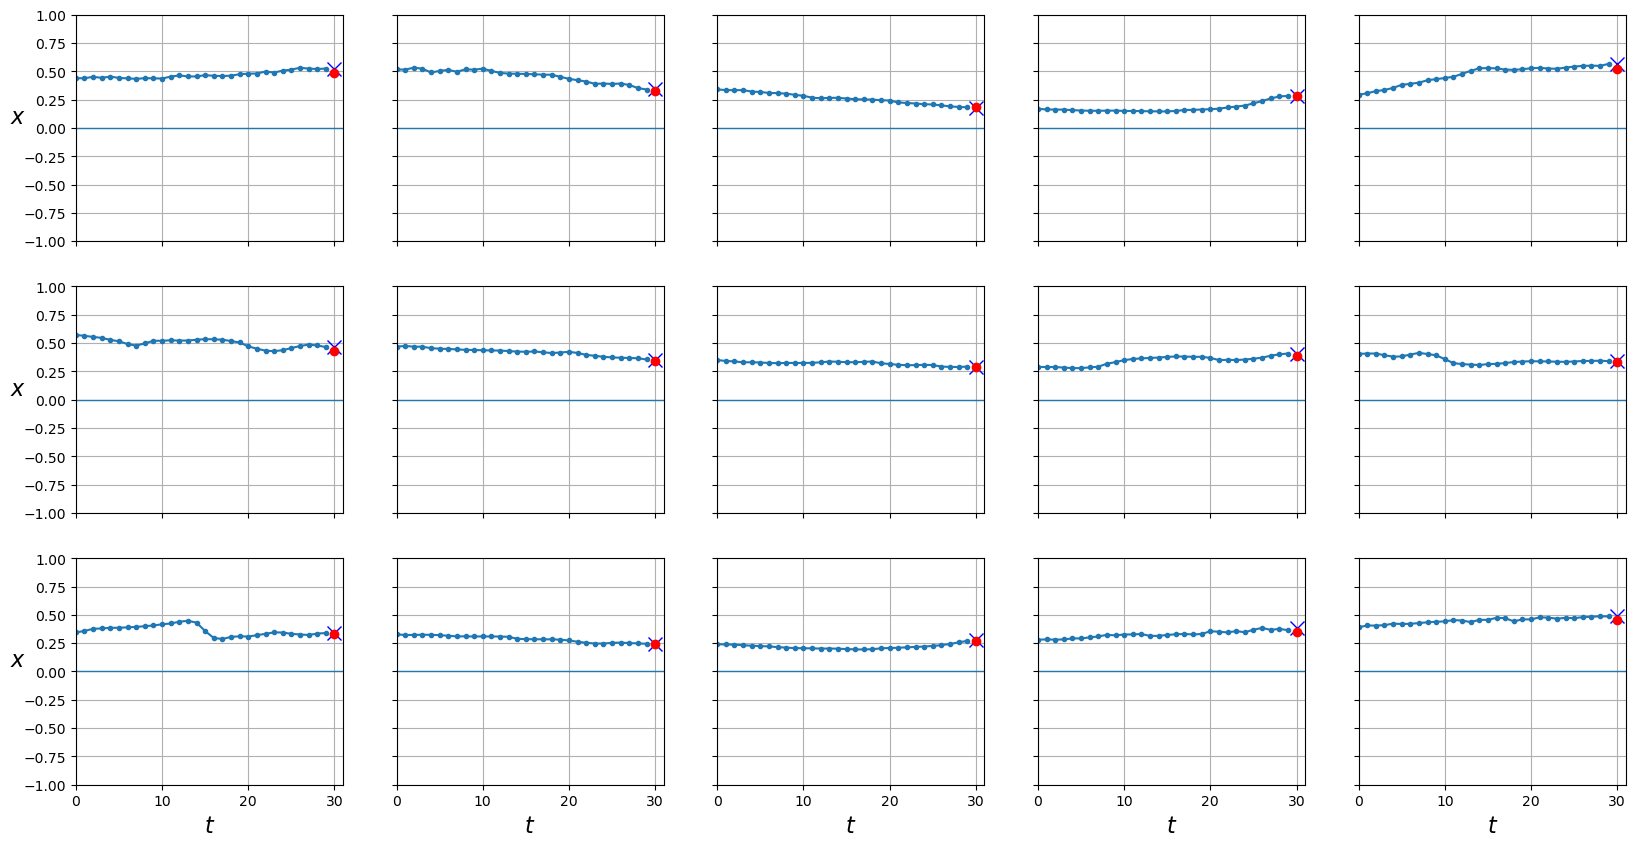

0.0008462024

In [109]:
y_pred = predict(rnn, dataloader['test'])
plot_series(X_test, y_test, y_pred.cpu().numpy())
mean_squared_error(y_test, y_pred.cpu())

### Red Recurrente robusta

In [110]:
class RNN(torch.nn.Module):
  def __init__(self):
    super().__init__()
    self.rnn = torch.nn.RNN(input_size=1, hidden_size=40, num_layers=1, batch_first=True)
    self.fc = torch.nn.Linear(40, 1)

  def forward(self, x):
    x, h = self.rnn(x)
    # get the last output and apply linear layer
    y = self.fc(x[:,-1])
    return y

rnn = RNN()
rnn

RNN(
  (rnn): RNN(1, 40, batch_first=True)
  (fc): Linear(in_features=40, out_features=1, bias=True)
)

In [111]:
fit(rnn, dataloader)

loss 0.00015 val_loss 0.00015: 100%|██████████| 10/10 [00:03<00:00,  3.17it/s]


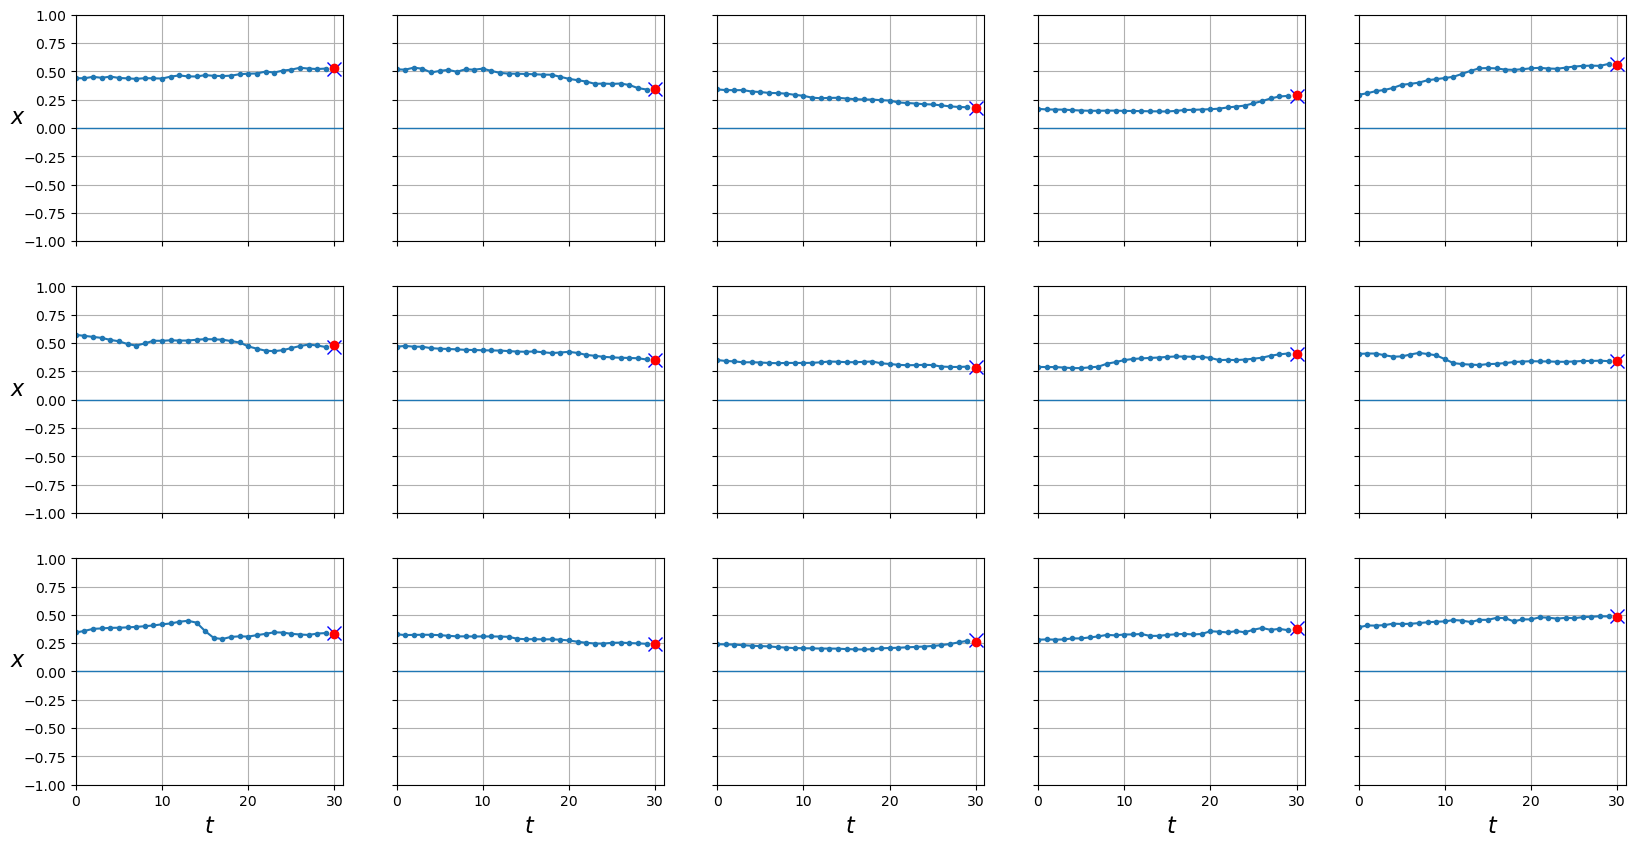

0.00012803097

In [112]:
y_pred = predict(rnn, dataloader['test'])
plot_series(X_test, y_test, y_pred.cpu().numpy())
mean_squared_error(y_test, y_pred.cpu())